In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [46]:
df = pd.read_csv(r'C:\Users\moon_\OneDrive - konkuk.ac.kr\바탕 화면\과제-DESKTOP-GPI9J2N\3-1\데이터애널리틱스/week4onm.csv', index_col=0)
df

,수빈,다영,루다,연정,다원,보나
수빈,0.000000,0.818881,0.541090,0.747854,0.632599,0.669186
다영,0.818881,0.000000,0.752802,0.763455,0.791238,0.838849
루다,0.541090,0.752802,0.000000,0.818723,0.819330,0.587130
연정,0.747854,0.763455,0.818723,0.000000,0.820445,0.740356
다원,0.632599,0.791238,0.819330,0.820445,0.000000,0.678883
보나,0.669186,0.838849,0.587130,0.740356,0.678883,0.000000


In [47]:
member = df.columns.tolist()
member

['수빈', '다영', '루다', '연정', '다원', '보나']

In [48]:
G_weighted = nx.Graph()

G_weighted.add_edge(member[0],  member[1], weight=df.iloc[0, 1])
G_weighted.add_edge(member[0],  member[2], weight=df.iloc[0, 2])
G_weighted.add_edge(member[0],  member[3], weight=df.iloc[0, 3])
G_weighted.add_edge(member[0],  member[4], weight=df.iloc[0, 4])
G_weighted.add_edge(member[0],  member[5], weight=df.iloc[0, 5])

G_weighted.add_edge(member[1],  member[2], weight=df.iloc[1, 2])
G_weighted.add_edge(member[1],  member[3], weight=df.iloc[1, 3])
G_weighted.add_edge(member[1],  member[4], weight=df.iloc[1, 4])
G_weighted.add_edge(member[1],  member[5], weight=df.iloc[1, 5])

G_weighted.add_edge(member[2],  member[3], weight=df.iloc[2, 3])
G_weighted.add_edge(member[2],  member[4], weight=df.iloc[2, 4])
G_weighted.add_edge(member[2],  member[5], weight=df.iloc[2, 5])

G_weighted.add_edge(member[3],  member[4], weight=df.iloc[3, 4])
G_weighted.add_edge(member[3],  member[5], weight=df.iloc[3, 5])

G_weighted.add_edge(member[4],  member[5], weight=df.iloc[4, 5])

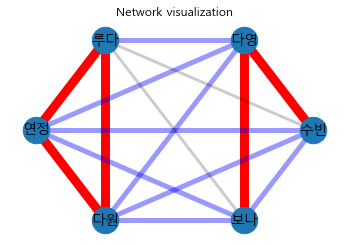

In [53]:
e_1 = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] >= 0.8]
e_2 = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if ((d['weight'] < 0.8) & (d['weight'] >= 0.6))]
e_3 = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if ((d['weight'] < 0.6) & (d['weight'] >= 0.4))]

pos = nx.circular_layout(G_weighted)

#nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

#edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=e_1, edge_color='r', width=9)
nx.draw_networkx_edges(G_weighted, pos, edgelist=e_2, alpha=0.4, edge_color='b', width=5)
nx.draw_networkx_edges(G_weighted, pos, edgelist=e_3, alpha=0.2, width=3)


#labels
nx.draw_networkx_labels(G_weighted, pos,font_family=font_name, font_size=14)

plt.title('Network visualization')
plt.axis('off')
plt.show();